In [40]:
from glob import glob
from os.path import join
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Data choice

In [41]:
experiment = 'december'

In [42]:
fruit = 'orange'

In [43]:
cut_quality = 'good' # good / shallow / deep

# Segmented data reading

In [44]:
data_folder = join('..', 'data', 'segmented_data', experiment, fruit, cut_quality)

In [45]:
data_files = os.listdir(data_folder)
print(data_files)

['orange_good_1.csv', 'orange_good_14.csv', 'orange_good_4.csv', 'orange_good_11.csv', 'orange_good_12.csv', 'orange_good_3.csv', 'orange_good_5.csv', 'orange_good_6.csv', 'orange_good_9.csv', 'orange_good_7.csv', 'orange_good_13.csv', 'orange_good_10.csv', 'orange_good_2.csv', 'orange_good_15.csv', 'orange_good_8.csv']


In [53]:
all_data = pd.DataFrame()

for f in data_files:
    data = pd.read_csv(join(data_folder, f), index_col=0)
    data['label'] = '-'.join([fruit, cut_quality])
    all_data = pd.concat([all_data, data], ignore_index=True)
    
#all_data

In [54]:
headers = ['displacement', 'force_x', 'force_y', 'force_z', 'label']
feature_headers = ['force_x', 'force_y', 'force_z']
all_data = all_data[headers]
all_data['displacement'] = all_data['displacement']*10

x = all_data[headers].values
x_train, x_test = train_test_split(x, test_size=200, train_size=500, random_state=42, shuffle=True)
train_data = pd.DataFrame(x_train, columns=headers)
test_data = pd.DataFrame(x_test, columns=headers)

if True:
    scaler = StandardScaler()
    x = train_data[feature_headers].values
    scaler.fit(x)
    
    train_data_standardized = scaler.transform(x)
    df_temp = pd.DataFrame(train_data_standardized, columns=feature_headers, index = train_data.index)
    train_data[feature_headers] = df_temp
    train_data = train_data.sort_values('displacement')
    train_data.reset_index(inplace=True, drop=True)
    
    test_data_standardized = scaler.transform(test_data[feature_headers].values)
    df_temp = pd.DataFrame(test_data_standardized, columns=feature_headers, index = test_data.index)
    test_data[feature_headers] = df_temp
    test_data = test_data.sort_values('displacement')
    test_data.reset_index(inplace=True, drop=True)
test_data

,displacement,force_x,force_y,force_z,label
0,0,-2.377148,-0.705999,0.602619,orange-good
1,0.010817,-0.772180,-0.303193,-1.016016,orange-good
2,0.0181576,0.407147,-1.318420,-2.632851,orange-good
3,0.0334438,-0.597208,-0.029991,-1.235065,orange-good
4,0.0397309,-0.322904,0.557274,-0.929743,orange-good
5,0.041078,0.301855,-2.348776,-2.097914,orange-good
6,0.0415252,-1.689002,-0.780766,-0.061183,orange-good
7,0.0451784,-0.000905,-1.150772,-1.461799,orange-good
8,0.048973,-1.752286,0.332397,-0.453067,orange-good
9,0.053604,-0.307497,0.882607,-0.562253,orange-good


In [57]:
train_data.to_csv(join(data_folder, '..', 'good_standardized_sampled_train.csv'), index=False)
test_data.to_csv(join(data_folder, '..', 'good_standardized_sampled_test.csv'), index=False)

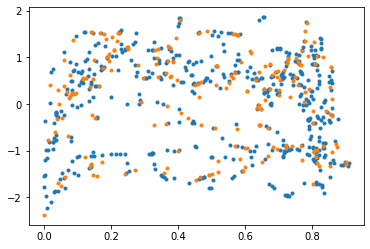

In [56]:
plt.plot(train_data['displacement'], train_data['force_x'], '.')
plt.plot(test_data['displacement'], test_data['force_x'], '.')
plt.show()